In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sci
from sklearn.linear_model import LinearRegression

In [154]:
# Import data for a few futures contracts
F_CL = pd.read_csv('C:/FuturesTickerData/F_CL.txt', parse_dates=['DATE'], index_col=['DATE'])
F_ES = pd.read_csv('C:/FuturesTickerData/F_ES.txt', parse_dates=['DATE'], index_col=['DATE'])
F_GC = pd.read_csv('C:/FuturesTickerData/F_GC.txt', parse_dates=['DATE'], index_col=['DATE'])
F_TY = pd.read_csv('C:/FuturesTickerData/F_TY.txt', parse_dates=['DATE'], index_col=['DATE'])
F_YM = pd.read_csv('C:/FuturesTickerData/F_YM.txt', parse_dates=['DATE'], index_col=['DATE'])

In [155]:
f_list = [F_CL, F_ES, F_GC, F_TY, F_YM]

In [156]:
# Drop the following columns
for f in f_list:
    f.drop(columns=[' P', ' R', ' RINFO'], inplace=True)
for f in f_list:
    print len(f)

7075
7111
7081
7085
5144


In [157]:
# Create a new dataframe with only closing prices of each futures

In [158]:
f_1000d = pd.DataFrame()

f_1000d['F_CL'] = F_CL[' CLOSE'].iloc[-1000:]
f_1000d['F_ES'] = F_ES[' CLOSE'].iloc[-1000:]
f_1000d['F_GC'] = F_GC[' CLOSE'].iloc[-1000:]
f_1000d['F_TY'] = F_TY[' CLOSE'].iloc[-1000:]
f_1000d['F_YM'] = F_YM[' CLOSE'].iloc[-1000:]

'''for f in f_list:
    x = f[' CLOSE'].iloc[-1000:]
    f_1000d[str(ES)] = x'''

"for f in f_list:\n    x = f[' CLOSE'].iloc[-1000:]\n    f_1000d[str(ES)] = x"

In [159]:
f_1000d.head()

,F_CL,F_ES,F_GC,F_TY,F_YM
DATE,,,,,
2014-03-25,99190.0,92962.5,131140.0,123468.8,81490.0
2014-03-26,100260.0,92125.0,130340.0,123796.9,80895.0
2014-03-27,101280.0,92025.0,129480.0,123859.4,80910.0
2014-03-28,101670.0,92525.0,129430.0,123562.5,81200.0
2014-03-31,101580.0,93225.0,128380.0,123500.0,81865.0


In [160]:
X_train = f_1000d.iloc[:-200]
y_train = f_1000d['F_ES'].iloc[1:-199]

model = LinearRegression().fit(X_train, y_train)

In [161]:
X_test = f_1000d[-199:-2]
preds = model.predict(X_test)

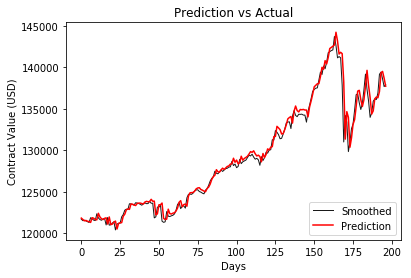

In [162]:
y_test = np.array(f_1000d['F_ES'].iloc[-198:-1])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_test, color=(0,0,0), linewidth=1, alpha=.9, label='Smoothed')
ax.plot(preds, color = (1,0,0), label = 'Prediction')
ax.legend(loc='lower right')
ax.set_title('Prediction vs Actual')
ax.set_xlabel('Days')
ax.set_ylabel('Contract Value (USD)')
plt.show()

In [163]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, preds)/200

4699.656372459172

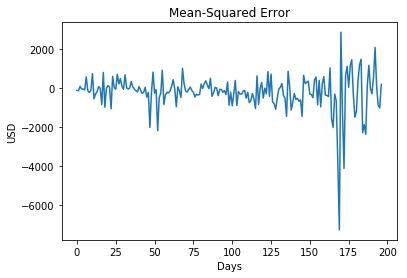

In [164]:
plt.figure()
plt.title('Mean-Squared Error')
plt.xlabel('Days')
plt.ylabel('USD')
plt.plot(y_test-preds)
plt.show()

## Futures Correlation Matrix

In [165]:
# Source: https://www.youtube.com/watch?v=isCP0P9eSVY
futures_ln = pd.DataFrame()
for col in f_1000d:
    if col not in futures_ln:
        futures_ln[col] = np.log(f_1000d[col]).diff()
print futures_ln.head()

                F_CL      F_ES      F_GC      F_TY      F_YM
DATE                                                        
2014-03-25       NaN       NaN       NaN       NaN       NaN
2014-03-26  0.010730 -0.009050 -0.006119  0.002654 -0.007328
2014-03-27  0.010122 -0.001086 -0.006620  0.000505  0.000185
2014-03-28  0.003843  0.005419 -0.000386 -0.002400  0.003578
2014-03-31 -0.000886  0.007537 -0.008146 -0.000506  0.008156


In [166]:
corr_futures = futures_ln.corr()
print corr_futures

          F_CL      F_ES      F_GC      F_TY      F_YM
F_CL  1.000000  0.306428  0.072636 -0.218815  0.292782
F_ES  0.306428  1.000000 -0.163867 -0.361624  0.964022
F_GC  0.072636 -0.163867  1.000000  0.349921 -0.181780
F_TY -0.218815 -0.361624  0.349921  1.000000 -0.370950
F_YM  0.292782  0.964022 -0.181780 -0.370950  1.000000


In [167]:
corr_futures['F_ES'].sort_values(ascending=False)

F_ES    1.000000
F_YM    0.964022
F_CL    0.306428
F_GC   -0.163867
F_TY   -0.361624
Name: F_ES, dtype: float64

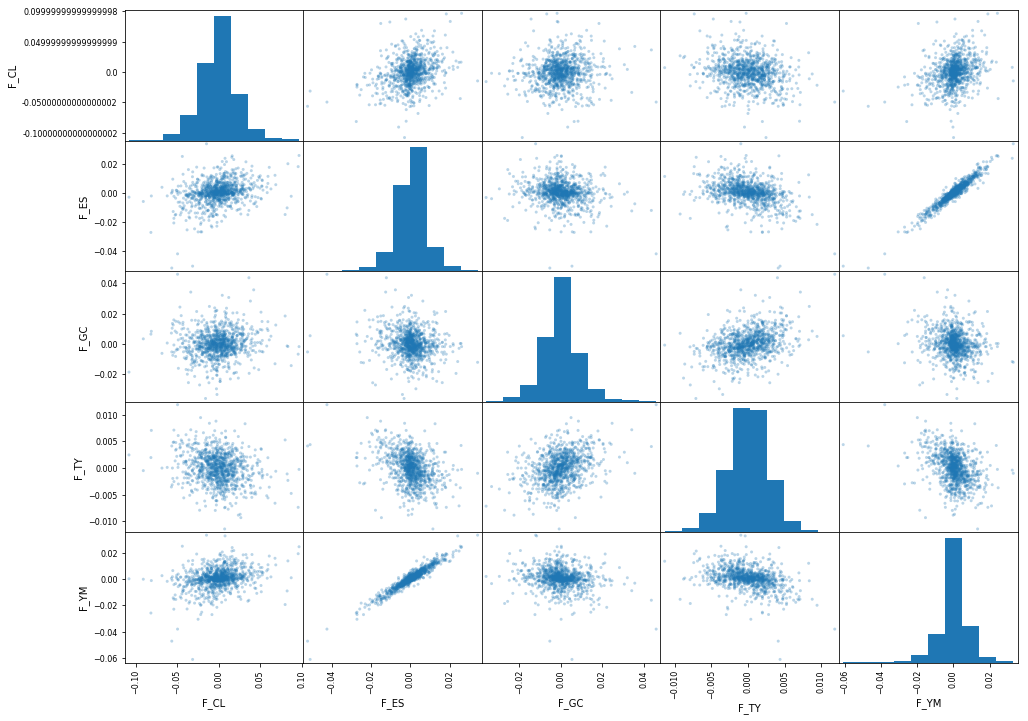

In [168]:
from pandas.plotting import scatter_matrix
f_scatter_matrix = scatter_matrix(futures_ln, figsize=(16,12), alpha=0.3)